In [11]:
# Installer scikit-learn
!pip install scikit-learn

# Vérifier l'installation en important sklearn
import sklearn
print(f"scikit-learn version : {sklearn.__version__}")


  Using cached scikit_learn-1.5.0-cp311-cp311-win_amd64.whl.metadata (11 kB)
  Using cached scipy-1.14.0-cp311-cp311-win_amd64.whl.metadata (60 kB)
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
Using cached scikit_learn-1.5.0-cp311-cp311-win_amd64.whl (11.0 MB)
Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
Using cached scipy-1.14.0-cp311-cp311-win_amd64.whl (44.7 MB)
Using cached threadpoolctl-3.5.0-py3-none-any.whl (18 kB)
scikit-learn version : 1.5.0


In [13]:
# Installer matplotlib
!pip install matplotlib

# Vérifier l'installation en important matplotlib.pyplot
import matplotlib.pyplot as plt


  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
     ---------------------------------------- 0.0/165.5 kB ? eta -:--:--
     -- ------------------------------------- 10.2/165.5 kB ? eta -:--:--
     ------------- ----------------------- 61.4/165.5 kB 656.4 kB/s eta 0:00:01
     ------------------------ ----------- 112.6/165.5 kB 939.4 kB/s eta 0:00:01
     -----------------------------------  163.8/165.5 kB 984.6 kB/s eta 0:00:01
     ------------------------------------ 165.5/165.5 kB 764.8 kB/s eta 0:00:00
  Using cached pyparsing-3.1.2-py3-none-any.whl.metadata (5.1 kB)
   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.0 MB 991.0 kB/s eta 0:00:08
   ---------------------------------------- 0.1/8.0 MB 1.1 MB/s eta 0:00:08
    --------------------------------------- 0.1/8.0 MB 1.1 MB/s eta 0:00:08
    --------------------------------------- 0.2/8.0 MB 1.1 MB/s eta 0:00:07
   - -----------------------

In [15]:
# Installer matplotlib
!pip install seaborn

# Vérifier l'installation en important seaborn
import seaborn as sns


  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)


In [39]:
#Bibliothéques
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
import seaborn as sns


In [40]:
#Chargement des données
data = pd.read_csv(r'C:\Users\lenovo\Documents\Orientation_datacopie.csv', sep=';', skipinitialspace=True)

In [41]:
#Aperçu des premières lignes
print(data.head())

   id_eleve     nefstat  id_annee moyenneGen  id_session  cd_matiere   Note
0    462844  3A33122010        15      10,91           1          11  13,94
1    462844  3A33122010        15      10,91           1          12   10,3
2    462844  3A33122010        15      10,91           1          13    9,8
3    462844  3A33122010        15      10,91           1          18     14
4    462844  3A33122010        15      10,91           1          19     17


In [42]:
#Gestion des valeurs manquantes par imputation de la moyenne
#data.fillna(data.mean(), inplace=True)

In [43]:
# Convertir les colonnes numériques avec des virgules en points
data['moyenneGen'] = data['moyenneGen'].str.replace(',', '.').astype(float)
data['Note'] = data['Note'].str.replace(',', '.').astype(float)
print(data.head())

   id_eleve     nefstat  id_annee  moyenneGen  id_session  cd_matiere   Note
0    462844  3A33122010        15       10.91           1          11  13.94
1    462844  3A33122010        15       10.91           1          12  10.30
2    462844  3A33122010        15       10.91           1          13   9.80
3    462844  3A33122010        15       10.91           1          18  14.00
4    462844  3A33122010        15       10.91           1          19  17.00


In [44]:
# Vérifier les types de données
print(data.dtypes)

id_eleve        int64
nefstat        object
id_annee        int64
moyenneGen    float64
id_session      int64
cd_matiere      int64
Note          float64
dtype: object


In [45]:
print(data.head())

   id_eleve     nefstat  id_annee  moyenneGen  id_session  cd_matiere   Note
0    462844  3A33122010        15       10.91           1          11  13.94
1    462844  3A33122010        15       10.91           1          12  10.30
2    462844  3A33122010        15       10.91           1          13   9.80
3    462844  3A33122010        15       10.91           1          18  14.00
4    462844  3A33122010        15       10.91           1          19  17.00


In [46]:
# Convertir les colonnes 
data['moyenneGen'] = pd.to_numeric(data['moyenneGen'], errors='coerce')
data['Note'] = pd.to_numeric(data['Note'], errors='coerce')


In [47]:
# Exemple de suppression des doublons
data.drop_duplicates(inplace=True)

In [48]:
# Supprimer les lignes avec des valeurs non convertibles
data = data.dropna(subset=['moyenneGen', 'Note'])

In [49]:
# Exploration de la distribution de la variable 
print(data['id_eleve'].value_counts())

2095416    86
7215685    86
4349103    86
491012     86
4722758    86
           ..
8837383    18
7680141    18
5443235    18
1389667    18
7563997    18
Name: id_eleve, Length: 847, dtype: int64


In [50]:
# Agrégation des données par élève, année et matière
aggregated_data = data.groupby(['id_eleve', 'id_annee', 'cd_matiere']).agg({
    'Note': 'mean', 
    'moyenneGen': 'mean',
    'nefstat': 'first'
}).reset_index()

In [51]:
# Définir les caractéristiques (features) et la variable cible (target)
X = aggregated_data[['Note', 'moyenneGen', 'cd_matiere', 'id_annee']]
y = aggregated_data['nefstat']

In [52]:
#from sklearn.preprocessing import OneHotEncoder

#Encodage one-hot des variables catégorielles
#encoder = OneHotEncoder()
#encoded_data = pd.DataFrame(encoder.fit_transform(data[['sexe', 'ville']]).toarray())
#data = pd.concat([data, encoded_data], axis=1)
#data.drop(['sexe', 'ville'], axis=1, inplace=True)


In [53]:
# Encodage des variables catégorielles
X = pd.get_dummies(X, columns=['cd_matiere', 'id_annee'])

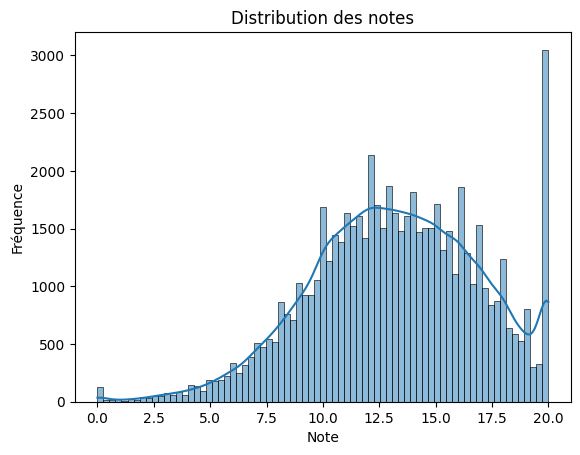

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualisation de la distribution des notes en mathématiques
sns.histplot(data['Note'], kde=True)
plt.title('Distribution des notes')
plt.xlabel('Note')
plt.ylabel('Fréquence')
plt.show()


In [55]:
print(data.columns)


Index(['id_eleve', 'nefstat', 'id_annee', 'moyenneGen', 'id_session',
       'cd_matiere', 'Note'],
      dtype='object')


In [56]:
# Convertir la colonne 'Note' en numérique
data.loc[:, 'Note'] = pd.to_numeric(data['Note'], errors='coerce')
print(data)
#data['Note'] = pd.to_numeric(data['Note'], errors='coerce')

       id_eleve     nefstat  id_annee  moyenneGen  id_session  cd_matiere  \
0        462844  3A33122010        15       10.91           1          11   
1        462844  3A33122010        15       10.91           1          12   
2        462844  3A33122010        15       10.91           1          13   
3        462844  3A33122010        15       10.91           1          18   
4        462844  3A33122010        15       10.91           1          19   
...         ...         ...       ...         ...         ...         ...   
67595    247082  2A33101010        12       12.40           2          19   
67596    247082  2A33101010        12       12.40           2          18   
67597    247082  2A33101010        12       12.40           2          13   
67598    247082  2A33101010        12       12.40           2          12   
67599    247082  2A33101010        12       12.40           2          11   

        Note  
0      13.94  
1      10.30  
2       9.80  
3      14.00  


In [57]:
print(data.dtypes)


id_eleve        int64
nefstat        object
id_annee        int64
moyenneGen    float64
id_session      int64
cd_matiere      int64
Note          float64
dtype: object


In [58]:
# Exemple de nettoyage de la colonne 'nefstat' et conversion en numérique
#data['nefstat_clean'] = pd.to_numeric(data['nefstat'], errors='coerce')

# Afficher les lignes où la conversion a échoué (valeurs non numériques)
#print(data[pd.isnull(data['nefstat_clean'])])

# Supprimer les lignes où la conversion a échoué
#data.dropna(subset=['nefstat_clean'], inplace=True)

In [66]:
# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instancier et entraîner le modèle d'arbre de décision
tree_classifier = DecisionTreeClassifier(random_state=42)
tree_classifier.fit(X_train, y_train)
y_pred = tree_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.88


In [63]:
# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Instancier le classifieur d'arbre de décision
tree_classifier = DecisionTreeClassifier()

# Entraîner le modèle
tree_classifier.fit(X_train, y_train)

# Prédire les valeurs de test
y_pred = tree_classifier.predict(X_test)

# Évaluer le modèle
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.88


In [68]:
# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Instancier et entraîner le modèle d'arbre de décision
tree_classifier = DecisionTreeClassifier(random_state=42)
tree_classifier.fit(X_train, y_train)
y_pred = tree_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.88


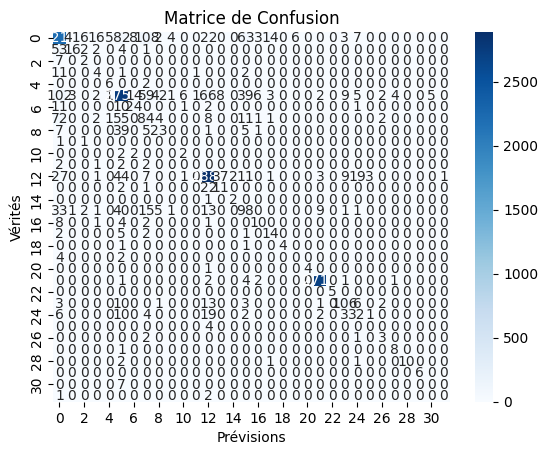

In [69]:
# Matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Matrice de Confusion')
plt.xlabel('Prévisions')
plt.ylabel('Vérités')
plt.show()

In [70]:
# Rapport de classification
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

  2A33101010       0.86      0.85      0.86      2601
  2A33101110       0.26      0.21      0.23        78
  2A33410400       0.15      0.22      0.18         9
  2A33410600       0.13      0.21      0.16        19
  2A33410900       0.46      0.75      0.57         8
  3A31122000       0.89      0.88      0.89      3134
  3A31122100       0.50      0.49      0.49        49
  3A31140000       0.29      0.35      0.31       241
  3A31140100       0.30      0.28      0.29        81
  3A31222000       0.00      0.00      0.00         2
  3A31300000       0.20      0.33      0.25         6
  3A31500000       0.00      0.00      0.00         7
  3A32122000       0.94      0.95      0.94      3052
  3A32122100       0.20      0.31      0.24        36
  3A32122200       0.50      0.67      0.57         3
  3A32142000       0.41      0.45      0.43       220
  3A32142100       0.43      0.38      0.41        26
  3A32334000       0.41    

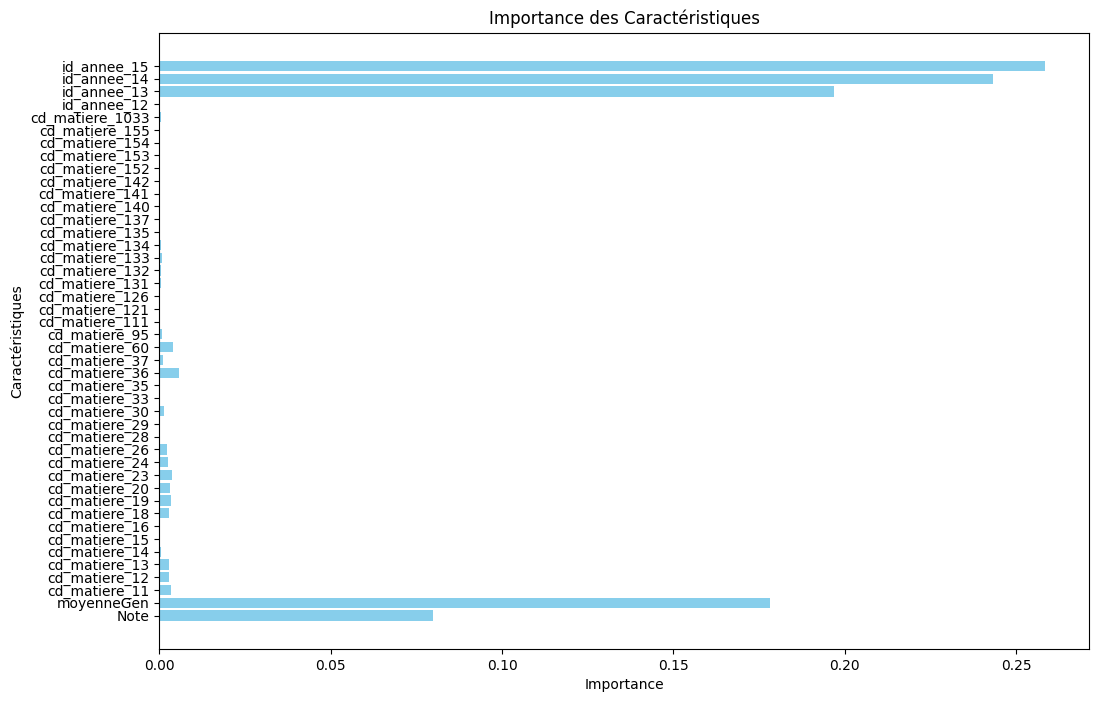

In [71]:
# Importance des caractéristiques
feature_importances = tree_classifier.feature_importances_
features = X.columns
plt.figure(figsize=(12, 8))
plt.barh(features, feature_importances, color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Caractéristiques')
plt.title('Importance des Caractéristiques')
plt.show()

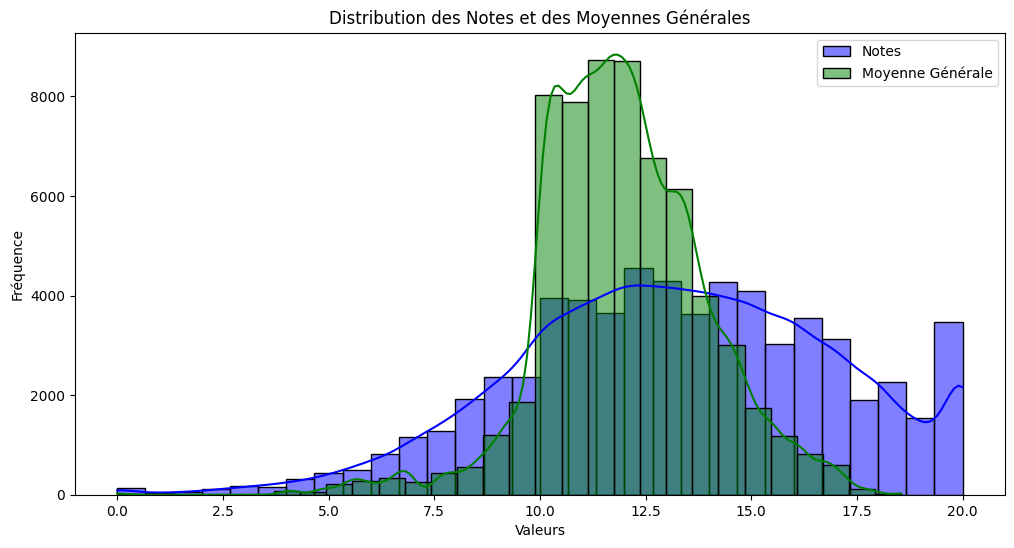

In [72]:
# Distribution des notes et des moyennes générales
plt.figure(figsize=(12, 6))
sns.histplot(data['Note'], kde=True, bins=30, color='blue', label='Notes')
sns.histplot(data['moyenneGen'], kde=True, bins=30, color='green', label='Moyenne Générale')
plt.title('Distribution des Notes et des Moyennes Générales')
plt.xlabel('Valeurs')
plt.ylabel('Fréquence')
plt.legend()
plt.show()

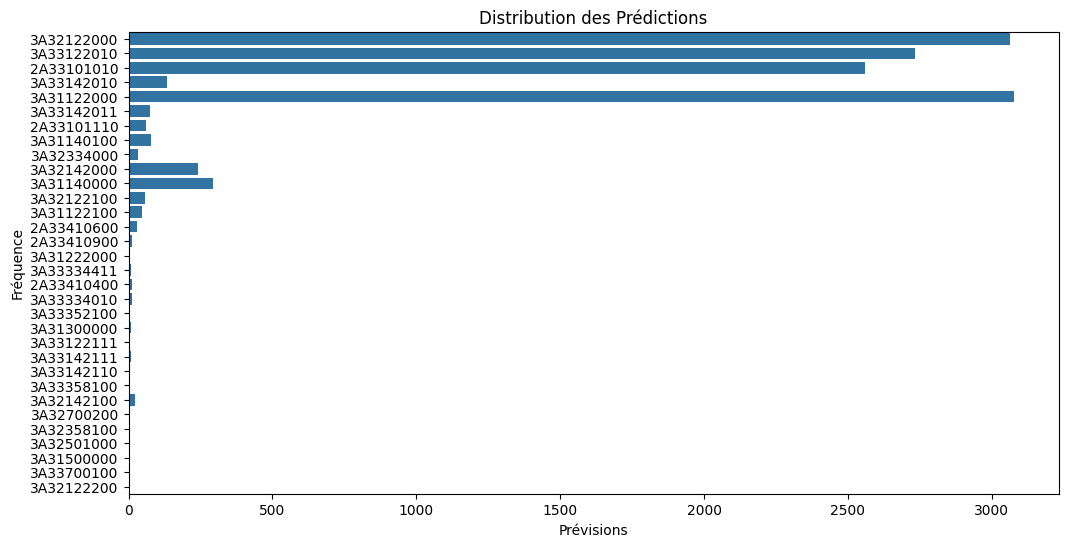

In [73]:
# Distribution des prédictions
plt.figure(figsize=(12, 6))
sns.countplot(y_pred)
plt.title('Distribution des Prédictions')
plt.xlabel('Prévisions')
plt.ylabel('Fréquence')
plt.show()

In [74]:
# Vérifier les classes uniques dans y
unique_classes = y.unique()
print(f"Classes uniques dans y : {unique_classes}")

Classes uniques dans y : ['3A32334000' '3A33334411' '2A33101010' '3A31122000' '3A32122000'
 '3A33122010' '3A31140100' '3A31140000' '3A32142000' '3A33142010'
 '2A33101110' '2A33410600' '3A33142011' '3A31122100' '3A32142100'
 '3A33142111' '3A32122100' '3A31300000' '3A32501000' '3A31500000'
 '3A33142110' '3A32700200' '3A33334010' '2A33410900' '3A32358100'
 '3A33358100' '3A33122111' '3A33352100' '2A33410400' '3A33700100'
 '3A32122200' '3A31222000']


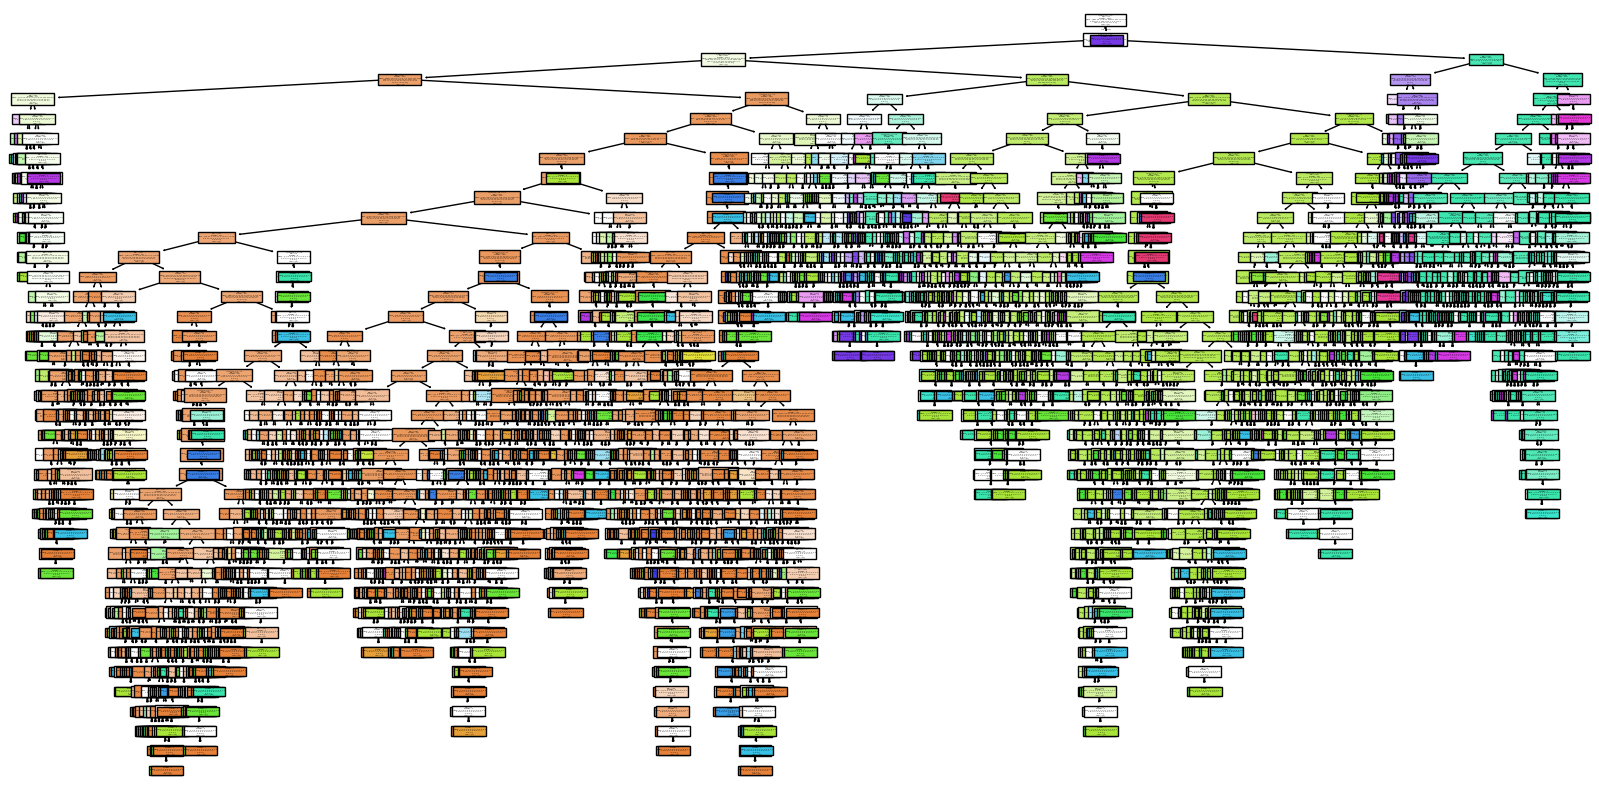

In [75]:
# Affichage de l'arbre de décision
plt.figure(figsize=(20, 10))
plot_tree(tree_classifier, feature_names=X.columns, class_names=True, filled=True)
plt.show()

In [76]:
# Profondeur de l'arbre de décision
print(f"Profondeur de l'arbre de décision: {tree_classifier.get_depth()}")

Profondeur de l'arbre de décision: 38


In [78]:
# Exemple de données pour l'année actuelle (année 14) pour plusieurs matières
note_exemple = 15
moyenne_gen_exemple = 17
id_annee_actuelle = 14  # Année actuelle
id_annee_prochaine = 15  # Année prochaine

# Liste des matières à tester avec leurs notes
matieres_exemples = [
    {'cd_matiere': 12, 'note': 15},
    {'cd_matiere': 13, 'note': 14},
    {'cd_matiere': 14, 'note': 16}
]
# Seuil de réussite de l'année
seuil_reussite = 14


In [79]:
# Fonction de prédiction
def predict_nefstat(note, moyenne_gen, cd_matiere, id_annee):
    # Créer une ligne de données pour la prédiction
    input_data = pd.DataFrame([[note, moyenne_gen, cd_matiere, id_annee]], columns=['Note', 'moyenneGen', 'cd_matiere', 'id_annee'])
    input_data = pd.get_dummies(input_data, columns=['cd_matiere', 'id_annee'])
    
    # Assurez-vous que les colonnes d'entrée sont les mêmes que celles utilisées pendant l'entraînement
    input_data = input_data.reindex(columns=X.columns, fill_value=0)
    
    # Faire la prédiction
    prediction = tree_classifier.predict(input_data)
    return prediction[0]

In [80]:
# Tester pour chaque matière
for matiere in matieres_exemples:
    cd_matiere = matiere['cd_matiere']
    note = matiere['note']
# Vérifier si l'année actuelle est réussie
if moyenne_gen_exemple >= seuil_reussite:
    print("Filière actuelle réussie.")
else:
    print("Filière actuelle n'est pas réussie.")
pred_nefstat_actuel = predict_nefstat(note, moyenne_gen_exemple, cd_matiere, id_annee_actuelle)
print(f"Meilleure prédiction de filière selon les notes: {pred_nefstat_actuel}")
    
# Prédire le nefstat de l'année prochaine pour chaque matière
meilleur_nefstat = predict_nefstat(note, moyenne_gen_exemple, cd_matiere, id_annee_prochaine)
print(f"Meilleur nefstat prédit pour l'année prochaine : {meilleur_nefstat}")

Filière actuelle réussie.
Meilleure prédiction de filière selon les notes: 3A32122000
Meilleur nefstat prédit pour l'année prochaine : 3A33122010


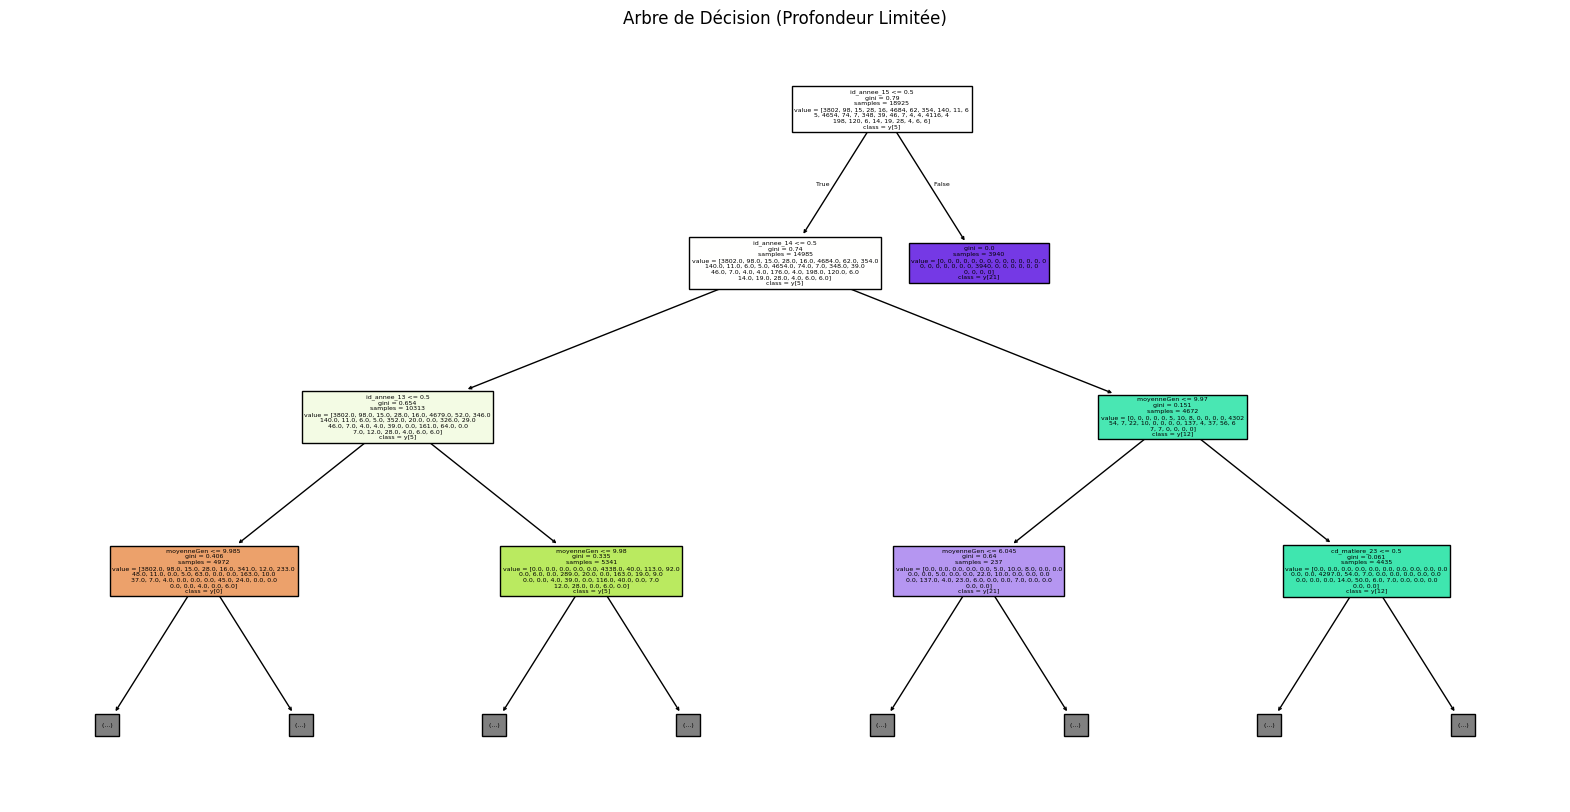

In [81]:
# Affichage de l'arbre de décision avec une profondeur limitée
plt.figure(figsize=(20, 10))
plot_tree(tree_classifier, feature_names=X.columns, class_names=True, filled=True, max_depth=3)
plt.title('Arbre de Décision (Profondeur Limitée)')
plt.show()


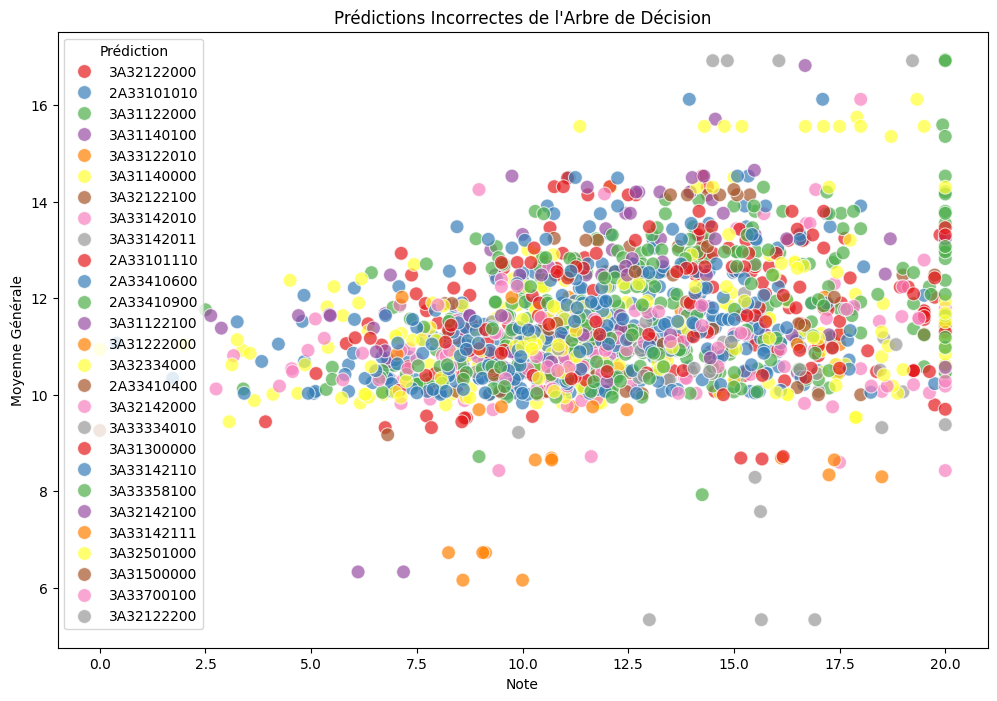

In [82]:
# Ajout des prédictions aux données de test
X_test_with_pred = X_test.copy()
X_test_with_pred['Prediction'] = y_pred
X_test_with_pred['Vérité'] = y_test

# Sélection des exemples avec des prédictions incorrectes
incorrect_predictions = X_test_with_pred[X_test_with_pred['Prediction'] != X_test_with_pred['Vérité']]

# Visualisation des caractéristiques pour les prédictions incorrectes
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Note', y='moyenneGen', hue='Prediction', data=incorrect_predictions, palette='Set1', s=100, alpha=0.7)
plt.title('Prédictions Incorrectes de l\'Arbre de Décision')
plt.xlabel('Note')
plt.ylabel('Moyenne Générale')
plt.legend(title='Prédiction')
plt.show()


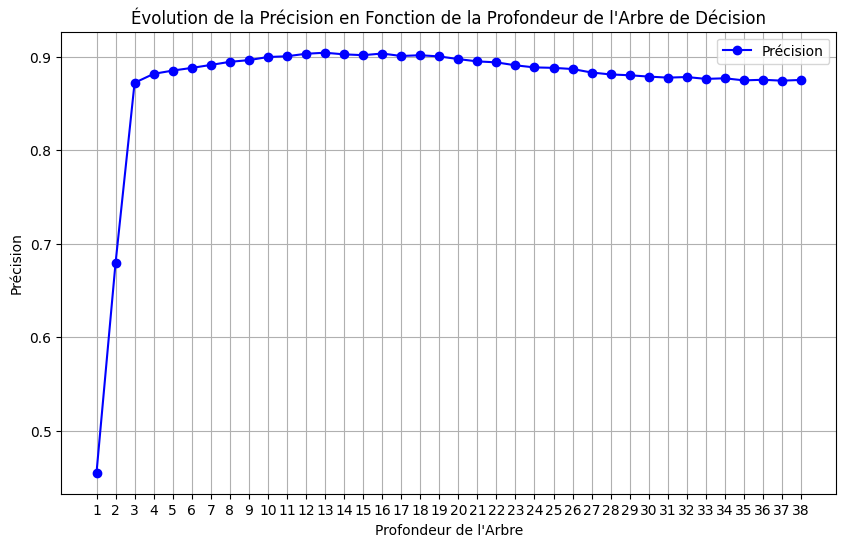

In [83]:
# Liste des profondeurs d'arbre à tester
depths = range(1, 39)
accuracies = []

# Entraînement et évaluation pour chaque profondeur
for depth in depths:
    model = DecisionTreeClassifier(max_depth=depth, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

# Tracer l'évolution de la précision en fonction de la profondeur
plt.figure(figsize=(10, 6))
plt.plot(depths, accuracies, marker='o', linestyle='-', color='b', label='Précision')
plt.title('Évolution de la Précision en Fonction de la Profondeur de l\'Arbre de Décision')
plt.xlabel('Profondeur de l\'Arbre')
plt.ylabel('Précision')
plt.xticks(depths)
plt.grid(True)
plt.legend()
plt.show()


Decision Tree: Accuracy = 0.88


C:\Users\lenovo\anaconda3\envs\jupyter-webapp-venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression: Accuracy = 0.87
Random Forest: Accuracy = 0.88
SVM: Accuracy = 0.87


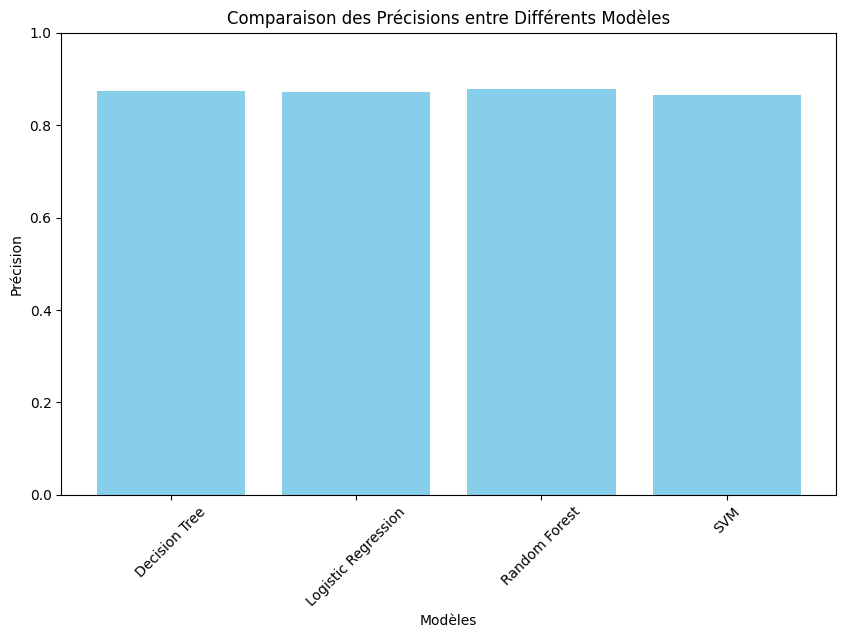

In [84]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Initialisation des modèles
models = {
    'Decision Tree': tree_classifier,
    'Logistic Regression': LogisticRegression(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(random_state=42)
}

# Évaluation des modèles et comparaison
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name}: Accuracy = {accuracy:.2f}")

# Comparaison des précisions
accuracies = [accuracy_score(y_test, model.predict(X_test)) for model in models.values()]

plt.figure(figsize=(10, 6))
plt.bar(models.keys(), accuracies, color='skyblue')
plt.title('Comparaison des Précisions entre Différents Modèles')
plt.xlabel('Modèles')
plt.ylabel('Précision')
plt.ylim([0.0, 1.0])
plt.xticks(rotation=45)
plt.show()


In [47]:
#import joblib
#joblib.dump(tree_classifier, 'my_model.pkl')


['my_model.pkl']

In [85]:
#import os
# Assurez-vous que le fichier est dans le répertoire de travail actuel
#print("Liste des fichiers dans le répertoire actuel :")
#print(os.listdir())



In [86]:
# Charger le modèle
#model_path = 'my_model.pkl'
#if os.path.exists(model_path):
#    tree_classifier = joblib.load(model_path)
    print("Le modèle a été chargé avec succès.")
else:
    print(f"Le fichier modèle '{model_path}' n'existe pas.")

NameError: name 'os' is not defined

In [87]:
# Installer le module watermark
#!pip install watermark

# Charger l'extension watermark
#%load_ext watermark

# Afficher les informations sur les versions des packages et autres caractéristiques
#%watermark -v -m -p wget,pandas,numpy,geopy,altair,vega,vega_datasets,watermark

# date
#print (" ")
#%watermark -u -n -t -z 

In [6]:
# Installer les modules manquants
!pip install wget pandas numpy geopy altair vega vega_datasets




In [7]:
# Charger l'extension watermark
%reload_ext watermark

# Afficher les informations sur les versions des packages et autres caractéristiques
%watermark -v -m -p wget,pandas,numpy,geopy,altair,vega,vega_datasets,watermark

# date
print (" ")
%watermark -u -n -t -z 

Python implementation: CPython
Python version       : 3.11.9
IPython version      : 8.25.0

wget         : 3.2
pandas       : 1.5.3
numpy        : 1.26.4
geopy        : 2.4.1
altair       : 5.3.0
vega         : 4.0.0
vega_datasets: 0.9.0
watermark    : 2.4.3

Compiler    : MSC v.1916 64 bit (AMD64)
OS          : Windows
Release     : 10
Machine     : AMD64
Processor   : Intel64 Family 6 Model 142 Stepping 10, GenuineIntel
CPU cores   : 8
Architecture: 64bit

 
Last updated: Sat Jun 29 2024 13:10:47Maroc (heure d’été)

